# Titanic Survival Prediction

Author: Rui Qin


## Setup

In [17]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
#Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

## Exploratory Analysis

*Number of survival of each gender*

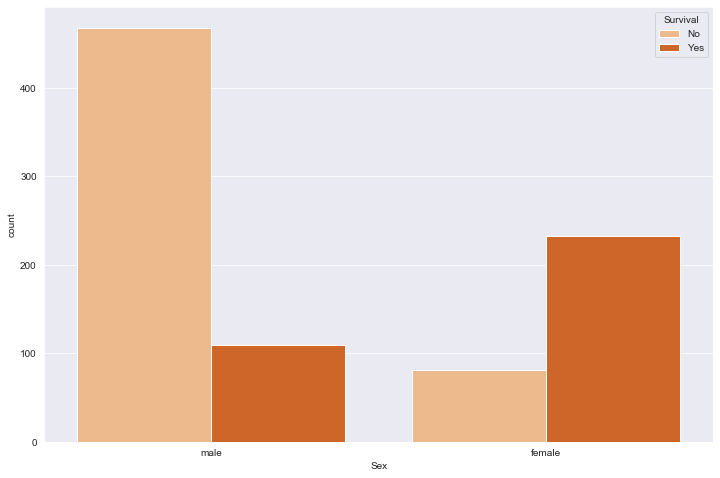

In [7]:
plt.figure(figsize=(12, 8)) 
train["Survival"] = train["Survived"].replace([0, 1], ["No", "Yes"])
sns.set_style("darkgrid")
sns.countplot(x="Sex", hue="Survival", data=train, palette="Oranges")

*Number of survival of each age group*

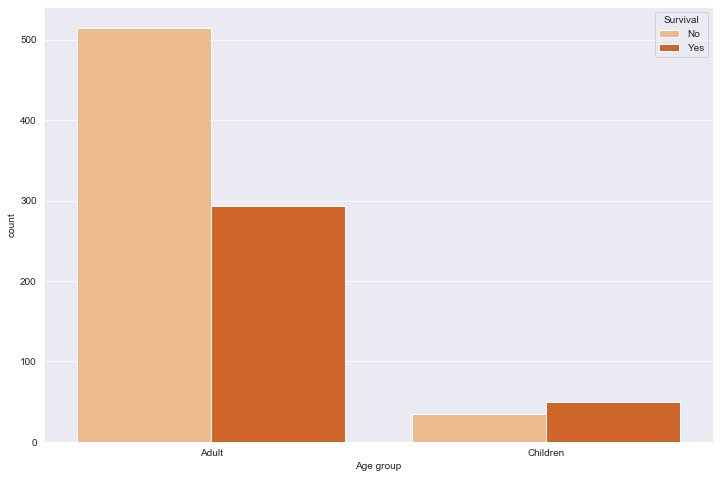

In [8]:
train["Age group"] = train["Age"].apply(lambda x: "Children" if x < 16 else "Adult")
plt.figure(figsize=(12, 8)) 
sns.countplot(x="Age group", hue="Survival", data=train, palette="Oranges")

*Number of survival of each ticket class*

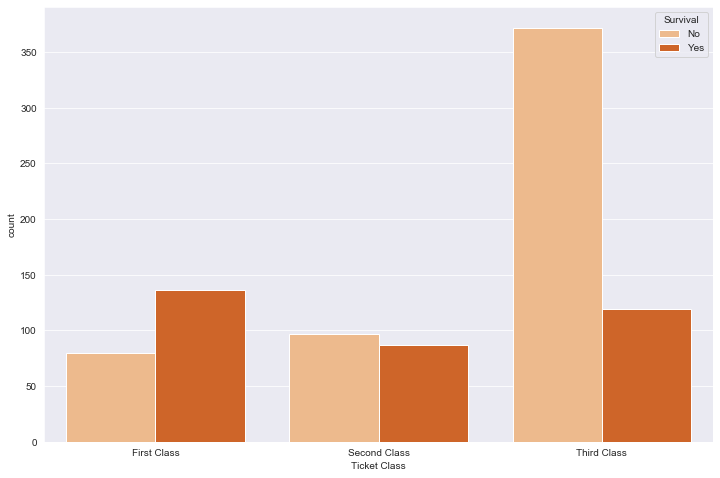

In [9]:
train["Ticket Class"] = train.Pclass.replace([1, 2, 3], ["First Class", "Second Class", "Third Class"])
plt.figure(figsize=(12, 8)) 
sns.countplot(x="Ticket Class", order=["First Class", "Second Class", "Third Class"], hue="Survival", data=train, palette="Oranges")

*Number of survival of different port of embarkation*

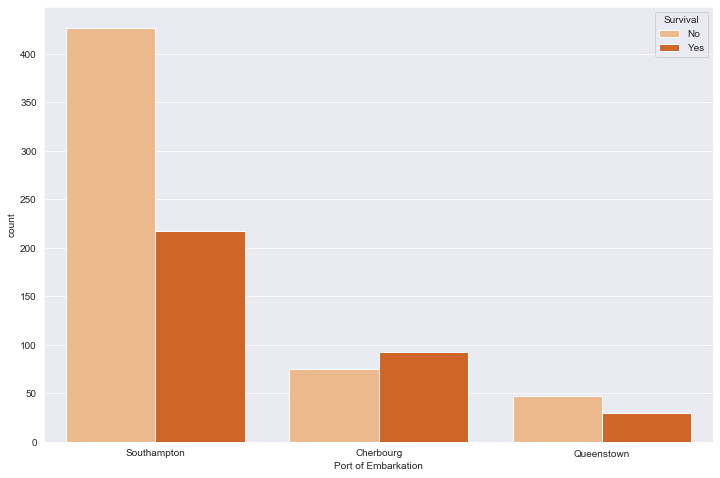

In [10]:
train["Port of Embarkation"] = train.Embarked.replace(["C", "S", "Q"], ["Cherbourg", "Southampton", "Queenstown"])
plt.figure(figsize=(12,8))
sns.countplot(x="Port of Embarkation", hue="Survival", data=train, palette="Oranges")

## Data Preprocessing

In [57]:
train = pd.read_csv("train.csv")
train = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
#train["Embarked"] = train["Embarked"].replace(["C", "S", "Q"], [0, 1, 2])
train["Age"] = train["Age"].apply(lambda x: 0 if x < 16 else 1)
train["Sex"].replace(["female", "male"], [0, 1], inplace = True)
#train.dropna(inplace = True)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,1,1,0,7.2500,0
1,1,0,1,1,0,71.2833,1
2,3,0,1,0,0,7.9250,1
3,1,0,1,1,0,53.1000,1
4,3,1,1,0,0,8.0500,0


In [58]:
test = pd.read_csv("test.csv")
test = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
#test["Embarked"] = test["Embarked"].replace(["C", "S", "Q"], [0, 1, 2])
test["Fare"] = test["Fare"].replace(np.nan, 0)
test["Age"] = test["Age"].apply(lambda x: 0 if x < 16 else 1)
test["Sex"].replace(["female", "male"], [0, 1], inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,1,0,0,7.8292
1,3,0,1,1,0,7.0000
2,2,1,1,0,0,9.6875
3,3,1,1,0,0,8.6625
4,3,0,1,1,1,12.2875


In [59]:
train = train.to_numpy()
test = test.to_numpy()


In [60]:
X_train = train[:, :-1]
y_train = train[:, -1]


## Machine Learning Algorithms
* Logistic Regression
* Support Vector Machines
* K Nearest Neighbors
* Random Forests
* Multilayer Perceptron

## Training

### Logistic Regression

In [17]:
classifier = LogisticRegression()
C_list = [2, 1, 0.1, 0.001, 0.0001]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
clf = GridSearchCV(estimator = classifier, param_grid = {"C": C_list, "solver": solver}, return_train_score = True)
clf.fit(X_train, y_train)
print("Best parameter:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameter: {'C': 0.1, 'solver': 'liblinear'}
Best score: 0.7990898248697509


### Support Vector Machines

In [27]:
classifier = svm.SVC()
C_list = [1, 0.1, 0.01]
kernel = ["linear", "poly", "rbf", "sigmoid"]
clf = GridSearchCV(estimator = classifier, param_grid = {"C": C_list, "kernel": kernel}, return_train_score = True)
clf.fit(X_train, y_train)
print("Best parameter:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameter: {'C': 1, 'kernel': 'linear'}
Best score: 0.7912309334002888


### K Nearest Neighbors

In [19]:
classifier = KNeighborsClassifier()
n_list = [5, 10, 15]
weights = ["uniform", "distance"]
alg = ["ball_tree", "kd_tree", "brute"]
clf = GridSearchCV(estimator = classifier, param_grid = {"n_neighbors": n_list, "weights": weights, "algorithm": alg}, return_train_score = True)
clf.fit(X_train, y_train)
print("Best parameter:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameter: {'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'distance'}
Best score: 0.7800577490427469


### Random Forests

In [20]:
classifier = RandomForestClassifier()
n = [40, 45, 50, 55, 60,]
criterion = ["gini", "entropy"]
max_depth = [5, 10, 15, None]
clf = GridSearchCV(estimator = classifier, param_grid = {"n_estimators": n, "criterion": criterion, "max_depth": max_depth}, return_train_score = True)
clf.fit(X_train, y_train)
print("Best parameter:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameter: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 60}
Best score: 0.8249262444291006


### Multilayer Perceptron

In [18]:
classifier = MLPClassifier(solver="lbfgs")
activation = ["identity", "logistic", "tanh", "relu"]
learning = ["constant", "invscaling", "adaptive"]
clf = GridSearchCV(estimator = classifier, param_grid = {"activation": activation, "learning_rate": learning}, return_train_score = True)
clf.fit(X_train, y_train)
print("Best parameter:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameter: {'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best score: 0.8091770761408574


## Testing

In [61]:
clf = RandomForestClassifier(criterion="entropy", max_depth=10, n_estimators=60)
clf.fit(X_train, y_train)
survived = clf.predict(test).astype(int)

## Result

In [68]:
test = pd.read_csv("test.csv")
res = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": survived})
res.to_csv("result.csv", index=False)